In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
from MovieLens import Movie_100K

In [3]:
dataset = Movie_100K()

In [4]:
dataset[1000:1002]

{'title': {1000: 'Dead Man Walking (1995)', 1001: 'Seven (Se7en) (1995)'},
 'date': {1000: array([1.        , 0.5       , 0.8660254 , 0.5       , 0.97952994]),
  1001: array([1.        , 0.5       , 0.8660254 , 0.5       , 0.97952994])},
 'genre': {1000: '[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]',
  1001: '[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]'},
 'user_id': {1000: 109, 1001: 109},
 'item_id': {1000: 9, 1001: 11},
 'rating': {1000: 3, 1001: 4},
 'timestamp': {1000: 880564607, 1001: 880572786},
 'age': {1000: 29, 1001: 29},
 'gender': {1000: 1, 1001: 1},
 'occupation': {1000: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  1001: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.])},
 'zip_code': {1000: '55423', 1001: '55423'}}

In [5]:
All_DataFrame = pd.DataFrame(dataset[:])

In [6]:
User_Genre = {}
for i in range(100000):
    
    user_id = All_DataFrame.loc[i,'user_id']
    if user_id not in User_Genre:
        User_Genre[user_id] = np.zeros((19,2))
    
    rating  = All_DataFrame.loc[i,'rating']
    genre = All_DataFrame.loc[i,'genre']
    genre = genre[1:len(genre)-1].split()
    genre = np.array([int(i) for i in genre])
    rate_x_genre = genre*rating
    User_Genre[user_id][:,0] += rate_x_genre
    User_Genre[user_id][:,1] += genre






    

In [7]:
User_Genre_Avg = {}
for user in User_Genre:
    User_Genre_Avg[user] = []
    for  i in range(19):
        if User_Genre[user][i,0] == 0:
            User_Genre_Avg[user].append(0)
        else:
            User_Genre_Avg[user].append(User_Genre[user][i,0]/User_Genre[user][i,1])


In [8]:
User_Genre_Avg = pd.DataFrame(User_Genre_Avg).T
User_Genre_Avg.columns = ['unknown','Action', 'Adventure', 'Animation',
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
              'Thriller', 'War', 'Western']

In [9]:
User_Genre_Avg['user_avg'] = User_Genre_Avg.mean(axis = 1)

In [10]:
User_Genre_Avg

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_avg
308,0.0,3.605263,3.604651,4.083333,3.7200,3.865079,3.945946,4.4,3.699387,3.571429,4.230769,3.703704,3.785714,3.789474,3.681818,3.825000,3.743902,3.766667,3.777778,3.621048
287,0.0,4.050000,4.125000,3.333333,4.0000,3.869565,4.888889,0.0,4.363636,0.000000,0.000000,3.800000,0.000000,4.666667,3.909091,3.727273,4.111111,3.800000,0.000000,2.770767
148,0.0,3.916667,3.933333,4.428571,3.8000,4.450000,3.666667,0.0,3.680000,0.000000,5.000000,2.000000,4.454545,3.000000,4.333333,4.461538,3.600000,4.100000,2.000000,3.201298
280,0.0,3.068493,3.051282,3.846154,3.6875,3.674699,3.666667,0.0,3.735632,3.166667,4.500000,3.416667,3.933333,3.857143,3.592593,3.129032,3.500000,3.550000,3.000000,3.177677
66,0.0,3.437500,3.000000,3.000000,3.0000,3.333333,3.666667,0.0,3.571429,0.000000,0.000000,4.000000,1.000000,3.000000,3.375000,3.750000,3.500000,3.800000,0.000000,2.391259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.0,3.000000,3.000000,0.000000,3.0000,3.857143,3.500000,0.0,3.733333,0.000000,0.000000,2.000000,4.000000,3.333333,3.666667,0.000000,3.600000,3.500000,0.000000,2.115288
685,0.0,1.000000,0.000000,0.000000,0.0000,2.250000,1.800000,0.0,2.222222,0.000000,2.500000,2.000000,2.000000,2.000000,1.833333,0.000000,2.000000,1.000000,0.000000,1.084503
713,0.0,2.200000,0.000000,0.000000,3.0000,2.857143,3.000000,0.0,3.111111,0.000000,4.000000,3.000000,1.000000,3.000000,2.800000,2.000000,2.888889,2.333333,0.000000,1.852130
631,0.0,2.666667,2.000000,0.000000,0.0000,2.600000,3.250000,0.0,3.750000,0.000000,0.000000,3.000000,4.000000,2.666667,3.000000,0.000000,3.142857,3.000000,0.000000,1.740852


In [11]:
User_Genre_Avg.to_csv('../../Datasets/ml-100k/user_genre.csv') #change to your directory

In [12]:
Genre_Average = User_Genre_Avg.mean(axis = 0)

In [13]:
d = dict(Genre_Average)

In [14]:
d

{'unknown': 0.033934252386002124,
 'Action': 3.500055343014554,
 'Adventure': 3.3704551387818653,
 'Animation': 2.500560314029345,
 'Children': 2.8788379894903007,
 'Comedy': 3.438750091412072,
 'Crime': 3.5310413919401222,
 'Documentary': 1.399284733470842,
 'Drama': 3.7284941759598946,
 'Fantasy': 1.7788627391225484,
 'Film-Noir': 2.5507232222237524,
 'Horror': 2.7977332584881296,
 'Musical': 2.7366357009522977,
 'Mystery': 3.4365612859027075,
 'Romance': 3.6591519143134756,
 'Sci-Fi': 3.418606568317417,
 'Thriller': 3.5240347718364435,
 'War': 3.7077367966703885,
 'Western': 1.9099254301136588,
 'user_avg': 2.8369150062329376}

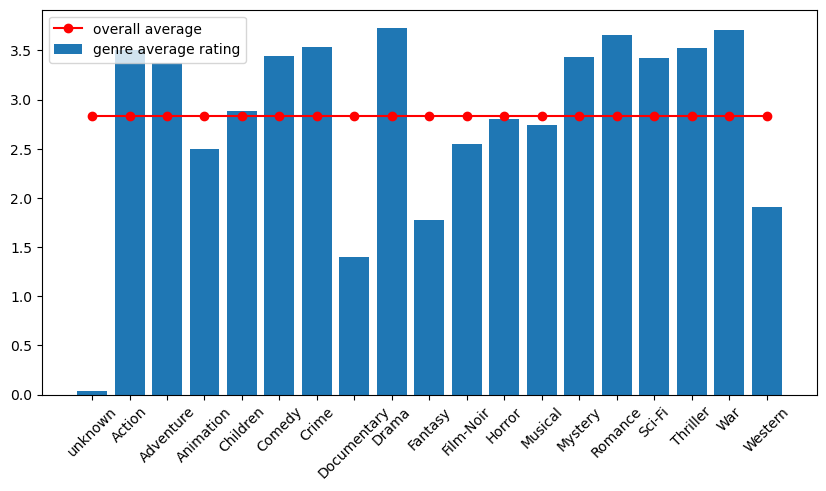

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(list(d.keys())[:19], list(d.values())[:19])
ax.plot(list(d.keys())[:19], list(d.values())[19]*np.ones((19,)), color='red', marker='o', label='Line Values')
plt.xticks(rotation=45)
ax.legend(['overall average','genre average rating'])

In [31]:
user_table = pd.read_csv('../../Datasets/ml-100k/user_info.csv') #change to your directory

In [33]:
user_table

,Unnamed: 0,user_id,age,gender,occupation,zip_code
0,0,1,24,M,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. ...,85711
1,1,2,53,F,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,94043
2,2,3,23,M,[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. ...,32067
3,3,4,24,M,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. ...,43537
4,4,5,33,F,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,15213
...,...,...,...,...,...,...
938,938,939,26,F,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,33319
939,939,940,32,M,[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,02215
940,940,941,20,M,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,97229
941,941,942,48,F,[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,78209


In [39]:
def fix_occupation_column(row):
    g = row['gender']
    if g == 'M':
        row['gender'] = 0
    else:
        row['gender'] = 1
    o = row['occupation']
    o = o[1:len(o)-1].split()
    o = [int(i[0]) for i in o]
    row['occupation'] = o

    return row
    

In [41]:
user_table = user_table.apply(fix_occupation_column,axis =1)

In [43]:
user_table

,Unnamed: 0,user_id,age,gender,occupation,zip_code
0,0,1,24,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",85711
1,1,2,53,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",94043
2,2,3,23,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",32067
3,3,4,24,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",43537
4,4,5,33,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15213
...,...,...,...,...,...,...
938,938,939,26,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33319
939,939,940,32,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",02215
940,940,941,20,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",97229
941,941,942,48,1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78209


In [45]:
join_table  = pd.merge(user_table, User_Genre_Avg, left_on='user_id', right_index = True)


In [63]:
join_table = join_table.drop(['Unnamed: 0'],axis = 1)

In [ ]:
j = join_table.set_index('user_id', inplace =True)

In [73]:
j 

'user_id'

In [83]:
join_table

,user_id,age,gender,occupation,zip_code,unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_avg
0,1,24,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",85711,4.0,3.333333,2.928571,3.333333,2.200000,...,5.0,3.461538,2.923077,3.600000,3.931818,4.000000,3.615385,3.680000,3.666667,3.621657
1,2,53,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",94043,0.0,3.800000,4.333333,4.000000,3.000000,...,4.5,3.000000,3.000000,3.500000,4.125000,3.750000,3.583333,3.666667,0.000000,3.088273
2,3,23,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",32067,0.0,2.785714,3.500000,0.000000,0.000000,...,2.5,2.400000,2.000000,3.181818,3.400000,2.750000,2.523810,2.800000,0.000000,2.175461
3,4,24,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",43537,0.0,3.875000,3.500000,0.000000,0.000000,...,0.0,4.000000,5.000000,4.000000,4.333333,3.833333,3.909091,4.500000,0.000000,2.957935
4,5,33,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15213,4.0,3.142857,3.242424,3.785714,2.448276,...,5.0,2.535714,3.333333,3.000000,2.315789,3.515152,2.947368,3.214286,2.500000,3.001919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33319,0.0,4.055556,3.500000,4.000000,4.000000,...,0.0,3.000000,4.000000,4.000000,4.800000,4.125000,4.083333,5.000000,0.000000,3.262427
939,940,32,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",02215,0.0,3.434783,3.000000,4.500000,4.200000,...,4.0,3.000000,3.142857,4.333333,3.541667,3.052632,3.350000,3.266667,0.000000,2.854507
940,941,20,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",97229,0.0,3.800000,3.857143,4.666667,4.500000,...,0.0,0.000000,4.000000,5.000000,5.000000,3.875000,4.000000,5.000000,0.000000,2.896930
941,942,48,1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",78209,0.0,4.111111,4.727273,4.750000,4.307692,...,5.0,3.666667,4.400000,4.000000,4.411765,4.166667,4.000000,4.700000,4.666667,3.653584


In [49]:
import seaborn as sns

In [85]:
corr = join_table.corr()


pandas.core.frame.DataFrame

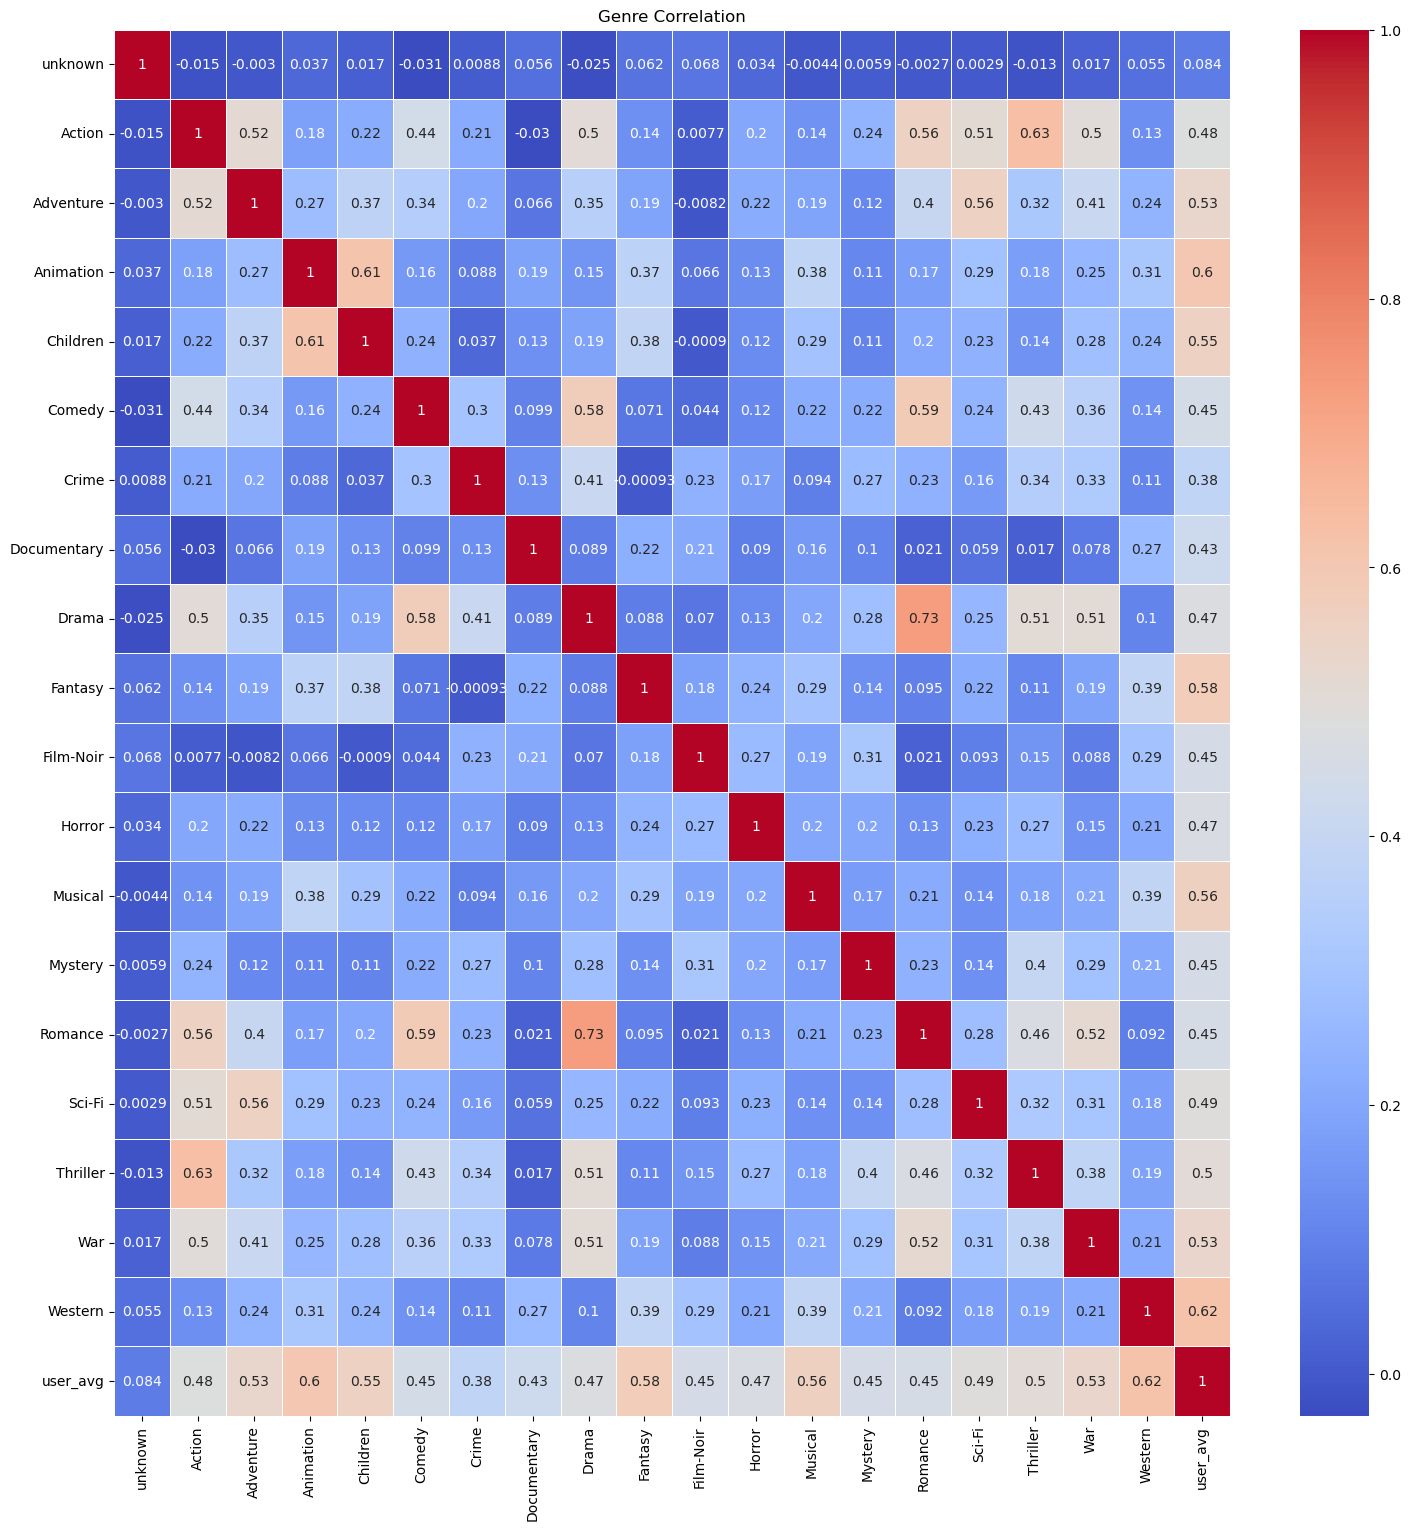

In [101]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr.iloc[3:,3:], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Genre Correlation')
plt.show()

Strongly correlated Genres: 
1. Drama and Romance and Comedy.
2. Animation and Children (what a shame)
3. Thriller and Action
4. Drama and War
5. Drama and Triller

Rating most predictable by User average:
1.Western
2.Animation
3.Fantasy
4.Musical
...



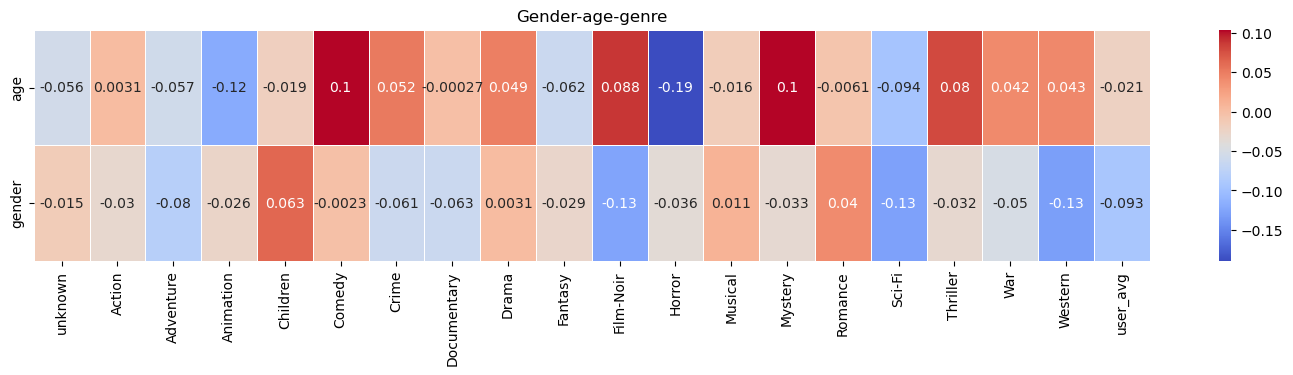

In [111]:
plt.figure(figsize=(18, 3))
sns.heatmap(corr.iloc[1:3,3:], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Gender-age-genre')
plt.show()

Way to read the plot: since we set 0=male 1=female. Red = more highly rated by female.
for age: red = more highly rated by older people.